In [199]:
import numpy as np
import math as mt
import pandas as pd
import matplotlib.pyplot as plt

In [200]:
data_frame = pd.read_csv('Iris.csv')
data_frame.set_index('Id', inplace=True)
test_frame = data_frame.loc[[1, 51, 101]]
sample_frame = data_frame.drop([1, 51, 101])

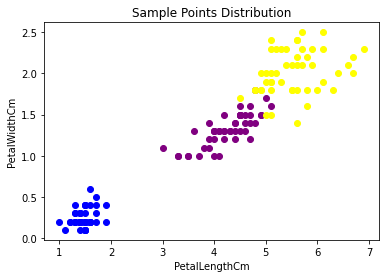

In [201]:
plt.scatter(x=sample_frame[sample_frame['Species']=='Iris-setosa']['PetalLengthCm'], y=sample_frame[sample_frame['Species']=='Iris-setosa']['PetalWidthCm'], color='blue')
plt.scatter(x=sample_frame[sample_frame['Species']=='Iris-versicolor']['PetalLengthCm'], y=sample_frame[sample_frame['Species']=='Iris-versicolor']['PetalWidthCm'], color='purple')
plt.scatter(x=sample_frame[sample_frame['Species']=='Iris-virginica']['PetalLengthCm'], y=sample_frame[sample_frame['Species']=='Iris-virginica']['PetalWidthCm'], color='yellow')
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.title('Sample Points Distribution')
plt.show()

In [202]:
def dist_from_mean(species, test_point):
     mean = sample_frame[sample_frame['Species']==species][['PetalLengthCm', 'PetalWidthCm']].mean().values
     return np.asmatrix(test_point-mean)

In [203]:
def inv_cov(species):
     cov = np.asmatrix(sample_frame[sample_frame['Species']==species][['PetalLengthCm', 'PetalWidthCm']].cov().values)
     return np.linalg.inv(cov)

In [204]:
#When the covariance is higher as in purple and yellow cluster, the Mahalanobis distance from the centroid 
#is useful to infer if a point is member of the distribution
def Mahalanobis_Dist(dist_from_mean, inv_cov):
     dist_from_meanT = np.transpose(dist_from_mean)
     return mt.sqrt(dist_from_mean @ inv_cov @ dist_from_meanT)

In [205]:
def classify(D):
     i = min([i for i, x in enumerate(D) if x<2])
     if i == 0:
          return 'Iris-setosa'
     elif i==1:
          return 'Iris-versicolor'
     else:
          return 'Iris-virginica'

In [206]:
dist_from_mean_setosa_of1 = dist_from_mean('Iris-setosa', test_frame.loc[1][['PetalLengthCm', 'PetalWidthCm']].values)
dist_from_mean_versicolor_of1 = dist_from_mean('Iris-versicolor', test_frame.loc[1][['PetalLengthCm', 'PetalWidthCm']].values)
dist_from_mean_virginica_of1 = dist_from_mean('Iris-virginica', test_frame.loc[1][['PetalLengthCm', 'PetalWidthCm']].values)

In [207]:
dist_from_mean_setosa_of51 = dist_from_mean('Iris-setosa', test_frame.loc[51][['PetalLengthCm', 'PetalWidthCm']].values)
dist_from_mean_versicolor_of51 = dist_from_mean('Iris-versicolor', test_frame.loc[51][['PetalLengthCm', 'PetalWidthCm']].values)
dist_from_mean_virginica_of51 = dist_from_mean('Iris-virginica', test_frame.loc[51][['PetalLengthCm', 'PetalWidthCm']].values)

In [209]:
dist_from_mean_setosa_of101 = dist_from_mean('Iris-setosa', test_frame.loc[101][['PetalLengthCm', 'PetalWidthCm']].values)
dist_from_mean_versicolor_of101 = dist_from_mean('Iris-versicolor', test_frame.loc[101][['PetalLengthCm', 'PetalWidthCm']].values)
dist_from_mean_virginica_of101 = dist_from_mean('Iris-virginica', test_frame.loc[101][['PetalLengthCm', 'PetalWidthCm']].values)

In [210]:
inv_cov_setosa = inv_cov('Iris-setosa')
inv_cov_versicolor = inv_cov('Iris-versicolor')
inv_cov_virginica = inv_cov('Iris-virginica')

In [211]:
Mahalanobis_Dist_1_setosa = Mahalanobis_Dist(dist_from_mean_setosa_of1, inv_cov_setosa)
Mahalanobis_Dist_1_versicolor = Mahalanobis_Dist(dist_from_mean_versicolor_of1, inv_cov_versicolor)
Mahalanobis_Dist_1_virginica = Mahalanobis_Dist(dist_from_mean_virginica_of1, inv_cov_virginica)
print("Mahalanobis Distance D(flower1, Iris-setosa) = ", Mahalanobis_Dist_1_setosa)
print("Mahalanobis Distance D(flower1, Iris-versicolor) = ", Mahalanobis_Dist_1_versicolor)
print("Mahalanobis Distance D(flower1, Iris-virginica) = ", Mahalanobis_Dist_1_virginica)
print("flower 1 is classified into the class", classify([Mahalanobis_Dist_1_setosa, Mahalanobis_Dist_1_versicolor, Mahalanobis_Dist_1_virginica]))

Mahalanobis Distance D(flower1, Iris-setosa) =  0.48939817358989846
Mahalanobis Distance D(flower1, Iris-versicolor) =  6.22001471438942
Mahalanobis Distance D(flower1, Iris-virginica) =  8.836776567169137
flower 1 is classified into the class Iris-setosa


In [212]:
Mahalanobis_Dist_51_setosa = Mahalanobis_Dist(dist_from_mean_setosa_of51, inv_cov_setosa)
Mahalanobis_Dist_51_versicolor = Mahalanobis_Dist(dist_from_mean_versicolor_of51, inv_cov_versicolor)
Mahalanobis_Dist_51_virginica = Mahalanobis_Dist(dist_from_mean_virginica_of51, inv_cov_virginica)
print("Mahalanobis Distance D(flower51, Iris-setosa) = ", Mahalanobis_Dist_51_setosa)
print("Mahalanobis Distance D(flower51, Iris-versicolor) = ", Mahalanobis_Dist_51_versicolor)
print("Mahalanobis Distance D(flower51, Iris-virginica) = ", Mahalanobis_Dist_51_virginica)
print("flower 51 is classified into the class", classify([Mahalanobis_Dist_51_setosa, Mahalanobis_Dist_51_versicolor, Mahalanobis_Dist_51_virginica]))

Mahalanobis Distance D(flower51, Iris-setosa) =  19.22674048470577
Mahalanobis Distance D(flower51, Iris-versicolor) =  1.130580072221175
Mahalanobis Distance D(flower51, Iris-virginica) =  2.4508748470314594
flower 51 is classified into the class Iris-versicolor


In [213]:
Mahalanobis_Dist_101_setosa = Mahalanobis_Dist(dist_from_mean_setosa_of101, inv_cov_setosa)
Mahalanobis_Dist_101_versicolor = Mahalanobis_Dist(dist_from_mean_versicolor_of101, inv_cov_versicolor)
Mahalanobis_Dist_101_virginica = Mahalanobis_Dist(dist_from_mean_virginica_of101, inv_cov_virginica)
print("Mahalanobis Distance D(flower101, Iris-setosa) = ", Mahalanobis_Dist_101_setosa)
print("Mahalanobis Distance D(flower101, Iris-versicolor) = ", Mahalanobis_Dist_101_versicolor)
print("Mahalanobis Distance D(flower101, Iris-virginica) = ", Mahalanobis_Dist_101_virginica)
print("flower 101 is classified into the class", classify([Mahalanobis_Dist_101_setosa, Mahalanobis_Dist_101_versicolor, Mahalanobis_Dist_101_virginica]))

Mahalanobis Distance D(flower101, Iris-setosa) =  29.267329586827923
Mahalanobis Distance D(flower101, Iris-versicolor) =  6.079684544928463
Mahalanobis Distance D(flower101, Iris-virginica) =  1.8231083365225484
flower 101 is classified into the class Iris-virginica


             Species
Id                  
1        Iris-setosa
51   Iris-versicolor
101   Iris-virginica


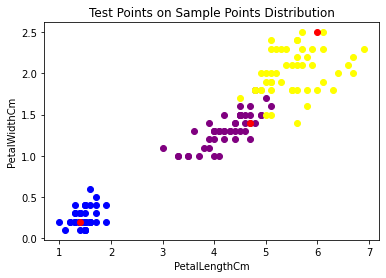

In [216]:

print(test_frame[['Species']])
plt.scatter(x=sample_frame[sample_frame['Species']=='Iris-setosa']['PetalLengthCm'], y=sample_frame[sample_frame['Species']=='Iris-setosa']['PetalWidthCm'], color='blue')
plt.scatter(x=sample_frame[sample_frame['Species']=='Iris-versicolor']['PetalLengthCm'], y=sample_frame[sample_frame['Species']=='Iris-versicolor']['PetalWidthCm'], color='purple')
plt.scatter(x=sample_frame[sample_frame['Species']=='Iris-virginica']['PetalLengthCm'], y=sample_frame[sample_frame['Species']=='Iris-virginica']['PetalWidthCm'], color='yellow')
plt.scatter(x=test_frame['PetalLengthCm'], y=test_frame['PetalWidthCm'], color='red')
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.title('Test Points on Sample Points Distribution')
plt.show()